# Summary

```Objective```

todo

```Methods```

todo

```Results```

todo

# Config

# Libs

In [1]:
import numpy as np
import torch
import torchio as tio
import torchio.transforms as transforms
import matplotlib.pyplot as plt
import h5py
import nibabel as nib

def show_img(img):
    plt.figure(dpi=150)
    im = plt.imshow(img, cmap='gray')
    # cbar = plt.colorbar(im, shrink=0.5)
    im.set_clim(vmin=0, vmax=0.7)
    plt.xticks([])
    plt.yticks([])
    plt.show()

def min_max_norm(img):
    min_value = np.min(img)
    max_value = np.max(img)
    normalized_data = (img - min_value) / (max_value - min_value)
    return normalized_data

c:\Users\NUGURI\anaconda3\envs\misalign\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
nii_path_3T1 = 'F:/KIST/CBM_2023/dataset/3T 7T/dataset/dataset/Aligned/sub-01/ses-1/anat/sub-01_ses-1_T2w_defaced_registered.nii.gz'
nii_path_7T1 = 'F:/KIST/CBM_2023/dataset/3T 7T/dataset/dataset/Aligned/sub-01/ses-2/anat/sub-01_ses-2_T2w_defaced_registered.nii.gz'
nii_3T1 = nib.load(nii_path_3T1)
nii_7T1 = nib.load(nii_path_7T1)
val_3T1 = nii_3T1.get_fdata()
val_7T1 = nii_7T1.get_fdata()

val_3T1 = min_max_norm(val_3T1)
val_7T1 = min_max_norm(val_7T1)

val_3T1 = np.transpose(val_3T1, [1,0,2])
val_7T1 = np.transpose(val_7T1, [1,0,2])
val_3T1 = np.flipud(val_3T1)
val_7T1 = np.flipud(val_7T1)

print('val 3T1 size: ', val_3T1.shape)
print('val 7T1 size: ', val_7T1.shape)

zz =200
show_img(val_3T1[:,:,zz])
show_img(val_7T1[:,:,zz])

blended_image = np.zeros((304, 256, 3))

blended_image[:, :, 0] = val_3T1[:,:,zz]*1.2
blended_image[:, :, 1] = val_3T1[:,:,zz]
blended_image[:, :, 1] = blended_image[:, :, 1]*0.4 + val_7T1[:,:,zz]*0.6
blended_image[:, :, 2] = val_7T1[:,:,zz]

show_img(blended_image)

In [ ]:
# 3T-7T val
nii_path_3T1 = 'F:/KIST/CBM_2023/dataset/3T 7T split/sub1_3T_T2.nii.gz'
nii_path_7T1 = 'F:/KIST/CBM_2023/dataset/3T 7T split/sub1_7T_T1.nii.gz'
nii_3T1 = nib.load(nii_path_3T1)
nii_7T1 = nib.load(nii_path_7T1)
val_3T1 = nii_3T1.get_fdata()
val_7T1 = nii_7T1.get_fdata()

val_3T1 = min_max_norm(val_3T1)
val_7T1 = min_max_norm(val_7T1)

val_3T1 = np.transpose(val_3T1, [1,0,2])
val_7T1 = np.transpose(val_7T1, [1,0,2])
val_3T1 = np.flipud(val_3T1)
val_7T1 = np.flipud(val_7T1)

print('val 3T1 size: ', val_3T1.shape)
print('val 7T1 size: ', val_7T1.shape)

zz =100
show_img(val_3T1[:,:,zz])
show_img(val_7T1[:,:,zz])

In [ ]:
# HDF5 파일로 저장하기
hdf5_file_path = 'C:/Users/NUGURI/Workspace/2023.08.22_misalign_CBM/data/MR_3T2_7T1_s/val/data.mat'
with h5py.File(hdf5_file_path, 'w') as file:
    file.create_dataset('data_x', data=val_3T1)
    file.create_dataset('data_y', data=val_7T1)

print("Data successfully saved as HDF5 file.")

3T1 size:  (304, 256, 200)
7T1 size:  (304, 256, 200)


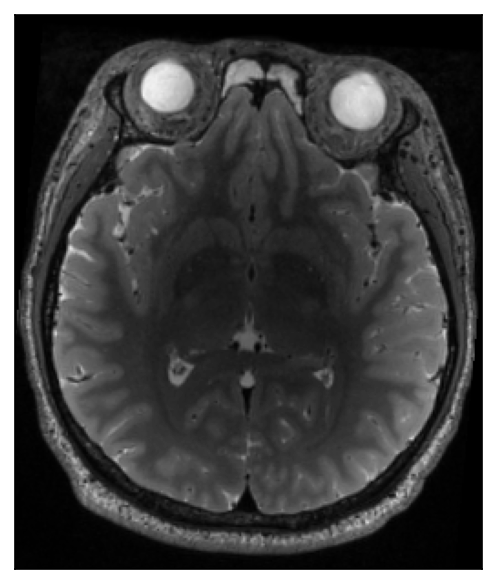

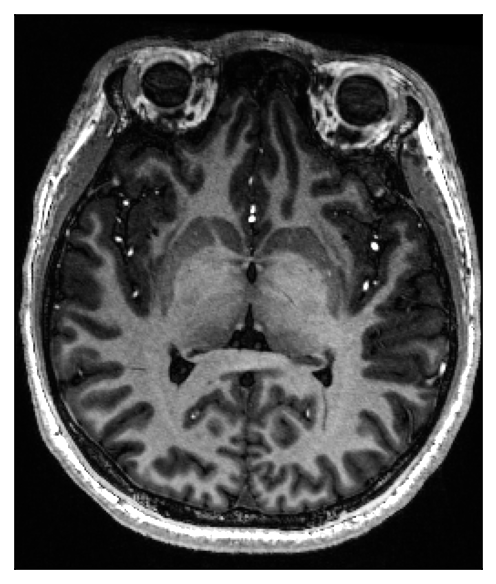

In [2]:
# 3T-7T train, test
nii_path_3T1 = 'F:/KIST/CBM_2023/dataset/3T 7T split/sub3_3T_T2.nii.gz'
nii_path_7T1 = 'F:/KIST/CBM_2023/dataset/3T 7T split/sub3_7T_T1.nii.gz'
nii_3T1 = nib.load(nii_path_3T1)
nii_7T1 = nib.load(nii_path_7T1)
train_3T1 = nii_3T1.get_fdata()
train_7T1 = nii_7T1.get_fdata()

train_3T1 = min_max_norm(train_3T1)
train_7T1 = min_max_norm(train_7T1)

train_3T1 = np.transpose(train_3T1, [1,0,2])
train_7T1 = np.transpose(train_7T1, [1,0,2])
train_3T1 = np.flipud(train_3T1)
train_7T1 = np.flipud(train_7T1)

print('3T1 size: ', train_3T1.shape)
print('7T1 size: ', train_7T1.shape)

zz =100
show_img(train_3T1[:,:,zz])
show_img(train_7T1[:,:,zz])

3T1 size:  (304, 256, 200)
7T1 size:  (304, 256, 200)


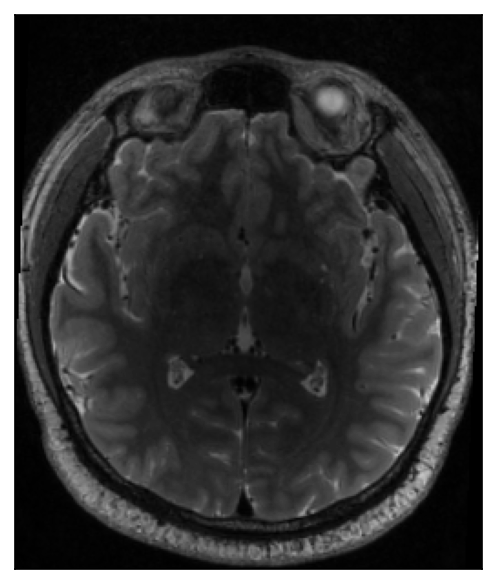

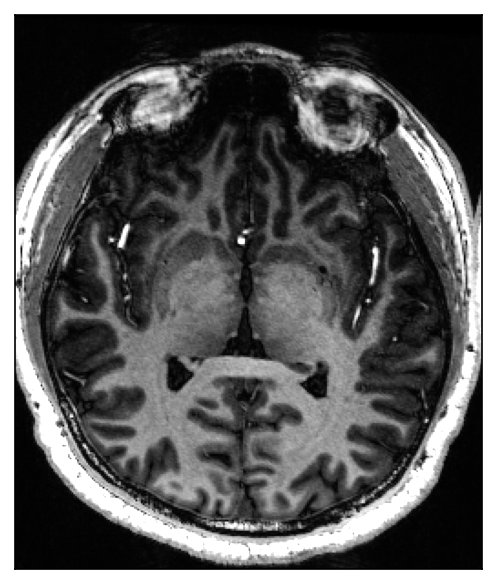

3T1 size:  (304, 256, 400)
7T1 size:  (304, 256, 400)


In [3]:
# 3T1- 7T1 train, test
nii_path_3T1 = 'F:/KIST/CBM_2023/dataset/3T 7T split/sub6_3T_T2.nii.gz'
nii_path_7T1 = 'F:/KIST/CBM_2023/dataset/3T 7T split/sub6_7T_T1.nii.gz'
nii_3T1 = nib.load(nii_path_3T1)
nii_7T1 = nib.load(nii_path_7T1)
tmp_3T1 = nii_3T1.get_fdata()
tmp_7T1 = nii_7T1.get_fdata()

tmp_3T1 = min_max_norm(tmp_3T1)
tmp_7T1 = min_max_norm(tmp_7T1)

tmp_3T1 = np.transpose(tmp_3T1, [1,0,2])
tmp_7T1 = np.transpose(tmp_7T1, [1,0,2])
tmp_3T1 = np.flipud(tmp_3T1)
tmp_7T1 = np.flipud(tmp_7T1)

print('3T1 size: ', tmp_3T1.shape)
print('7T1 size: ', tmp_7T1.shape)

zz =100
show_img(tmp_3T1[:,:,zz])
show_img(tmp_7T1[:,:,zz])

train_3T1 = np.concatenate((train_3T1, tmp_3T1), 2)
train_7T1 = np.concatenate((train_7T1, tmp_7T1), 2)

print('3T1 size: ', train_3T1.shape)
print('7T1 size: ', train_7T1.shape)

In [4]:
# HDF5 파일로 저장하기
hdf5_file_path = 'C:/Users/NUGURI/Workspace/2023.08.22_misalign_CBM/data/MR_3T2_7T1_s/test/data.mat'
with h5py.File(hdf5_file_path, 'w') as file:
    file.create_dataset('data_x', data=train_3T1)
    file.create_dataset('data_y', data=train_7T1)

print("Data successfully saved as HDF5 file.")

Data successfully saved as HDF5 file.


In [ ]:
import numpy as np
import torch
import torchio as tio
import torchio.transforms as transforms
import matplotlib.pyplot as plt
import h5py
import nibabel as nib
from misalign.data.MR_3T1_7T1_datamodule import MR_3T1_7T1_DataModule

misalign_x = 0
misalign_y = 5
degree = 2.5
motion_prob = 0
deform_prob = 0

_ = MR_3T1_7T1_DataModule('C:/Users/NUGURI/Workspace/2023.08.22_misalign_CBM/data/MR_3T1_7T1', misalign_x=misalign_x, misalign_y=misalign_y, degree=degree, motion_prob=motion_prob, deform_prob=deform_prob)
_.prepare_data()


In [ ]:
def show_img(img):
    plt.figure(dpi=150)
    im = plt.imshow(img, cmap='gray')
    cbar = plt.colorbar(im, shrink=0.5)
    im.set_clim(vmin=-1, vmax=1)
    plt.xticks([])
    plt.yticks([])
    plt.show()


_.setup()
train_data = _.train_dataloader()

for a, b in train_data:
    print(a.shape, b.shape)
    break

for _a, _b in zip(a,b):
    # blended_img = blend_and_transpose(_a[0], _b[0])
    show_img(np.concatenate((_a[0], _b[0]),1))